#Customer Churn Analysis

## Telecom (B2C) Sample Dataset

In [1]:
#from __future__ import division
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

#set sea born plot grid to white
sns.set_style("white")

# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import matplotlib.pyplot as plt

# special matplotlib argument for improved plots
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

####Load Sample Dataset

In [32]:
#loading data file
churnDF = pd.read_csv('C:/Users/manohars/Documents/Data/Telco-Customer-Churn.csv')
col_names = churnDF.columns.tolist()

print "Column names:"
print col_names
print churnDF.shape
print "\nSample data:"
churnDF.head(6)

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
(7043, 21)

Sample data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [9]:
#DO NOT RUN
#catdict = dict(zip(np.unique(churnDF['MultipleLines']).tolist(), [np.float(i) for i in range(len(np.unique(churnDF[col])))]))
print np.unique(churnDF['MultipleLines']).tolist()
print [np.float(i) for i in range(len(np.unique(churnDF['MultipleLines'])))]
print zip(np.unique(churnDF['MultipleLines']).tolist(), [np.float(i) for i in range(len(np.unique(churnDF['MultipleLines'])))])
d =  dict(zip(np.unique(churnDF['MultipleLines']).tolist(), [np.float(i) for i in range(len(np.unique(churnDF['MultipleLines'])))]))
print d['Yes']

['No', 'No phone service', 'Yes']
[0.0, 1.0, 2.0]
[('No', 0.0), ('No phone service', 1.0), ('Yes', 2.0)]
2.0


## Data Wrangling

In [49]:
churnDF.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [189]:
#convert all categorical values into numerical
CatCols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','gender','InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in CatCols:
    catdict = dict(zip(np.unique(churnDF[col]).tolist(), [np.float(i) for i in range(len(np.unique(churnDF[col])))]))
    churnDF[col] = [catdict[i] for i in churnDF[col]]

In [34]:
churnDF['Churn'] = np.where(churnDF['Churn'] == 'Yes', 1, 0)

In [47]:
#create new column to range the tenure or create a categorical 1 year, 2 year, 3 year, more than 3+ years
churnDF['tenureLabel'] = pd.cut(churnDF['tenure'], 3, labels=["Newbie","Normal", "Vetran"])

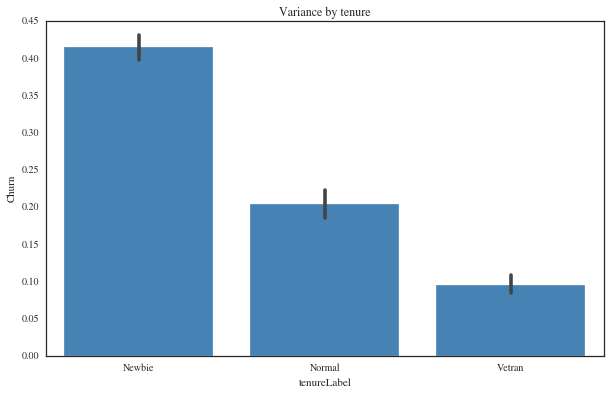

In [48]:
#variance of response variable by tenure
sns.barplot('tenureLabel', 'Churn', data=churnDF, color="steelblue")
plt.title('Variance by tenure')
plt.show()

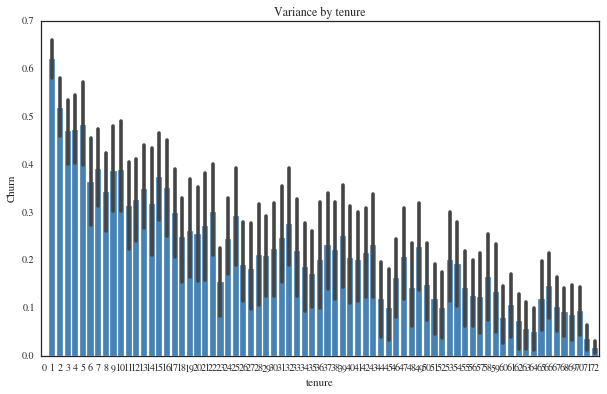

In [50]:
#variance of response variable by tenure
sns.barplot('tenure', 'Churn', data=churnDF, color="steelblue")
plt.title('Variance by tenure')
plt.show()

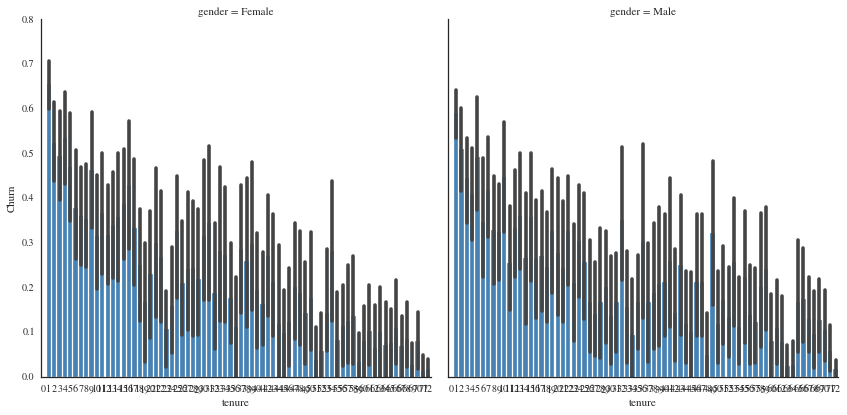

In [51]:
#variance of response variable by weather code by year
g = sns.FacetGrid(churnDF, col='gender', sharex=False, margin_titles=True, size=6, xlim=(1,31))
g.map(sns.barplot, 'tenure', 'Churn', color="steelblue")
plt.show()

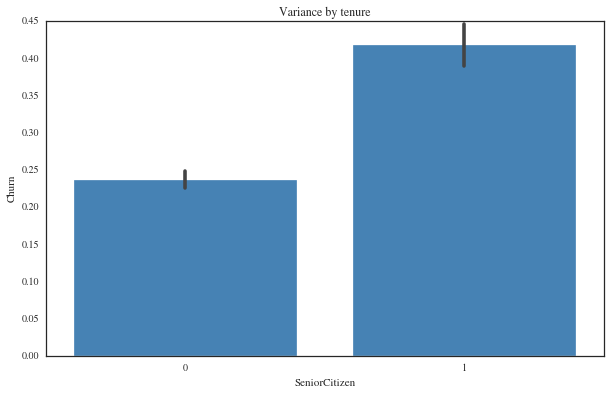

In [55]:
#variance of response variable by tenure
sns.barplot('SeniorCitizen', 'Churn', data=churnDF, color="steelblue")
plt.title('Variance by tenure')
plt.show()

In [19]:
churnDF = pd.get_dummies(churnDF, prefix=['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','gender','InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod'], 
                         columns=['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','gender','InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod'])
print churnDF.shape

(7043, 48)


In [20]:
print churnDF.columns.tolist()

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'gender_Female', 'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank t

In [21]:
churnDF.columns = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen_0', 'SeniorCitizen_1', 
                   'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 
                   'MultipleLines_No', 'MultipleLines_NoPhoneService', 'MultipleLines_Yes', 'gender_Female', 'gender_Male', 
                   'InternetService_DSL', 'InternetService_FiberOptic', 'InternetService_No', 
                   'OnlineSecurity_No', 'OnlineSecurity_NoInternetService', 'OnlineSecurity_Yes', 
                   'OnlineBackup_No', 'OnlineBackup_NoInternetService', 'OnlineBackup_Yes', 
                   'DeviceProtection_No', 'DeviceProtection_NoInternetService', 'DeviceProtection_Yes', 
                   'TechSupport_No', 'TechSupport_NoInternetService', 'TechSupport_Yes', 
                   'StreamingTV_No', 'StreamingTV_NoInternetService', 'StreamingTV_Yes', 
                   'StreamingMovies_No', 'StreamingMovies_NoInternetService', 'StreamingMovies_Yes', 
                   'Contract_Month-to-month', 'Contract_OneYear', 'Contract_TwoYear', 
                   'PaperlessBilling_No', 'PaperlessBilling_Yes', 
                   'PaymentMethod_BankTransferAutomatic', 'PaymentMethod_CreditCardAutomatic', 'PaymentMethod_ElectronicCheck', 
                   'PaymentMethod_MailedCheck']
churnDF.columns = [x.lower() for x in churnDF.columns]
print churnDF.columns.tolist()

['customerid', 'tenure', 'monthlycharges', 'totalcharges', 'churn', 'seniorcitizen_0', 'seniorcitizen_1', 'partner_no', 'partner_yes', 'dependents_no', 'dependents_yes', 'phoneservice_no', 'phoneservice_yes', 'multiplelines_no', 'multiplelines_nophoneservice', 'multiplelines_yes', 'gender_female', 'gender_male', 'internetservice_dsl', 'internetservice_fiberoptic', 'internetservice_no', 'onlinesecurity_no', 'onlinesecurity_nointernetservice', 'onlinesecurity_yes', 'onlinebackup_no', 'onlinebackup_nointernetservice', 'onlinebackup_yes', 'deviceprotection_no', 'deviceprotection_nointernetservice', 'deviceprotection_yes', 'techsupport_no', 'techsupport_nointernetservice', 'techsupport_yes', 'streamingtv_no', 'streamingtv_nointernetservice', 'streamingtv_yes', 'streamingmovies_no', 'streamingmovies_nointernetservice', 'streamingmovies_yes', 'contract_month-to-month', 'contract_oneyear', 'contract_twoyear', 'paperlessbilling_no', 'paperlessbilling_yes', 'paymentmethod_banktransferautomatic',

In [22]:
#handle missing values
churnDF['totalcharges'] = [0.0 if i == ' ' else np.float(i) for i in churnDF['totalcharges']] 
churnDF.head()

,customerid,tenure,monthlycharges,totalcharges,churn,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,...,streamingmovies_yes,contract_month-to-month,contract_oneyear,contract_twoyear,paperlessbilling_no,paperlessbilling_yes,paymentmethod_banktransferautomatic,paymentmethod_creditcardautomatic,paymentmethod_electroniccheck,paymentmethod_mailedcheck
0,7590-VHVEG,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [23]:
churnDF.columns

Index([u'customerid', u'tenure', u'monthlycharges', u'totalcharges', u'churn', u'seniorcitizen_0', u'seniorcitizen_1', u'partner_no', u'partner_yes', u'dependents_no', u'dependents_yes', u'phoneservice_no', u'phoneservice_yes', u'multiplelines_no', u'multiplelines_nophoneservice', u'multiplelines_yes', u'gender_female', u'gender_male', u'internetservice_dsl', u'internetservice_fiberoptic', u'internetservice_no', u'onlinesecurity_no', u'onlinesecurity_nointernetservice', u'onlinesecurity_yes', u'onlinebackup_no', u'onlinebackup_nointernetservice', u'onlinebackup_yes', u'deviceprotection_no', u'deviceprotection_nointernetservice', u'deviceprotection_yes', u'techsupport_no', u'techsupport_nointernetservice', u'techsupport_yes', u'streamingtv_no', u'streamingtv_nointernetservice', u'streamingtv_yes', u'streamingmovies_no', u'streamingmovies_nointernetservice', u'streamingmovies_yes', u'contract_month-to-month', u'contract_oneyear', u'contract_twoyear', u'paperlessbilling_no', u'paperlessbi

##Exploratory Data Analysis
####Explore the dataset and find any pattern or co-relations exist between variables

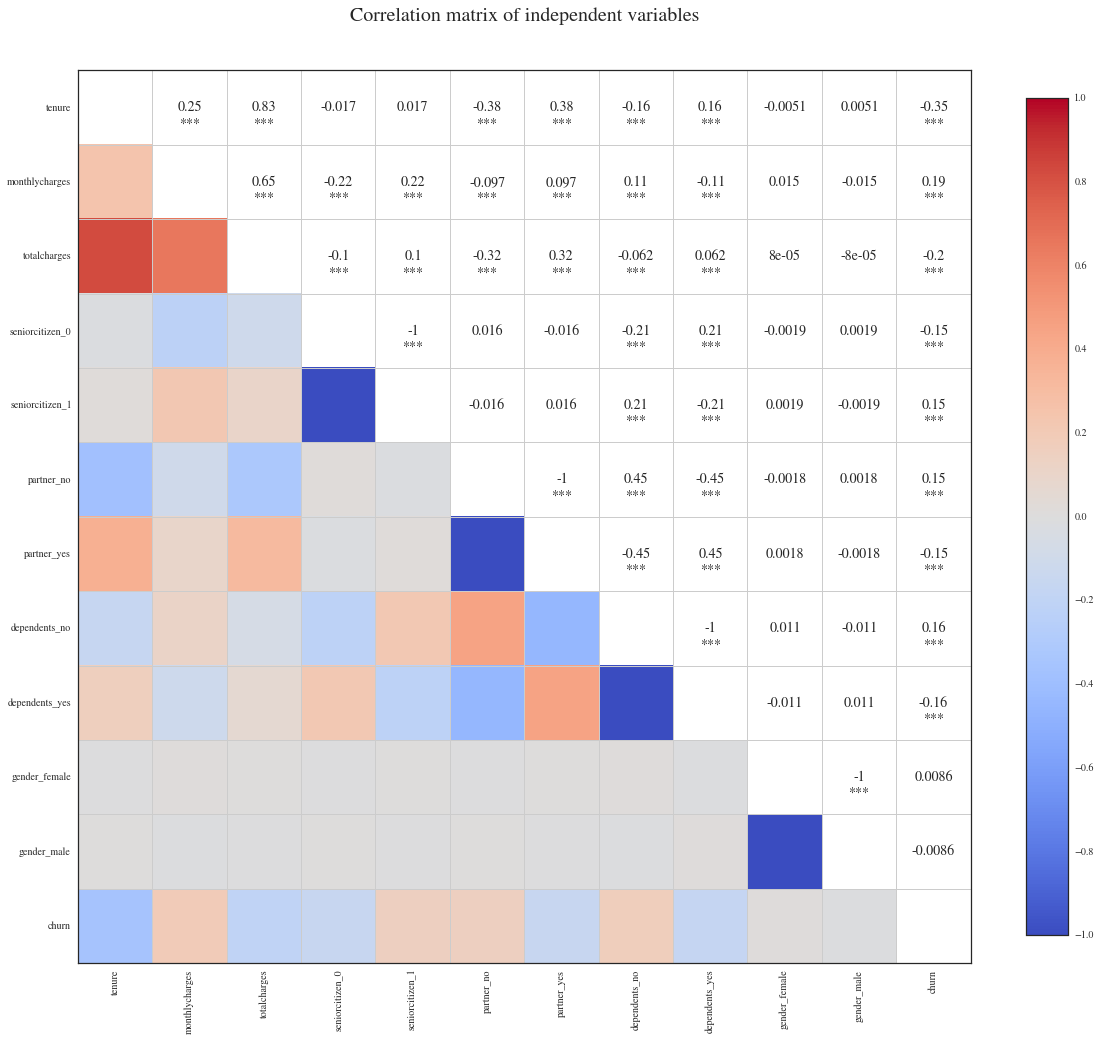

In [25]:
#correlation matrix between all "weather" input vairables
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Correlation matrix of independent variables', fontsize=20)
sns.corrplot(churnDF[[u'tenure', u'monthlycharges', u'totalcharges', u'seniorcitizen_0', u'seniorcitizen_1', 
                      u'partner_no', u'partner_yes', u'dependents_no', u'dependents_yes', u'gender_female', u'gender_male',
                      u'churn']], diag_names=False, ax=ax);
plt.show()

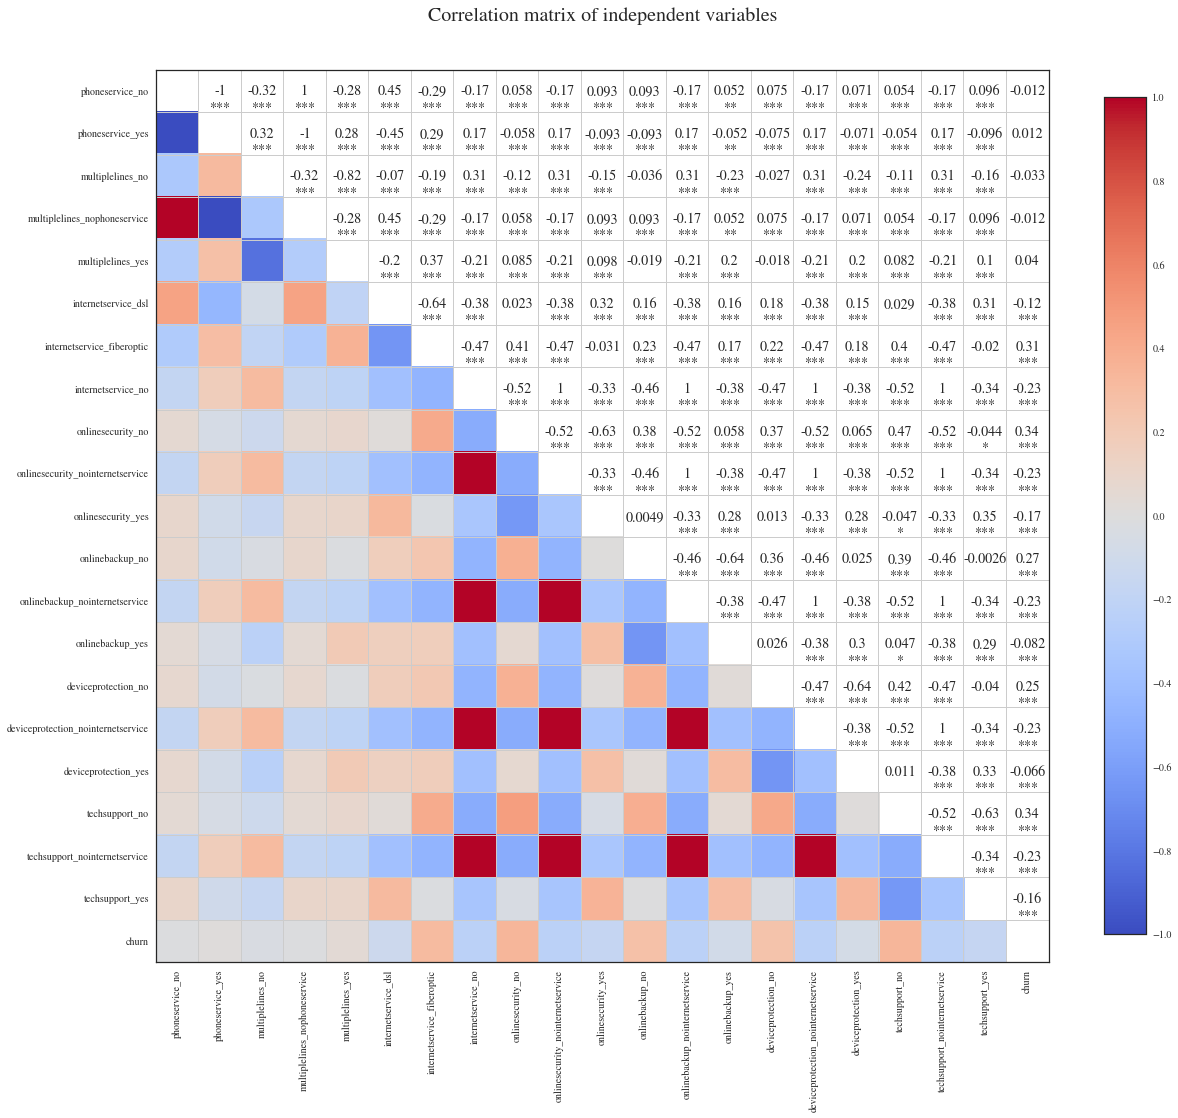

In [27]:
#correlation matrix vairables
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Correlation matrix of independent variables', fontsize=20)
sns.corrplot(churnDF[[u'phoneservice_no', u'phoneservice_yes', u'multiplelines_no', u'multiplelines_nophoneservice', 
                      u'multiplelines_yes', u'internetservice_dsl', u'internetservice_fiberoptic', u'internetservice_no', 
                      u'onlinesecurity_no', u'onlinesecurity_nointernetservice', u'onlinesecurity_yes', u'onlinebackup_no', 
                      u'onlinebackup_nointernetservice', u'onlinebackup_yes', u'deviceprotection_no', 
                      u'deviceprotection_nointernetservice', u'deviceprotection_yes', u'techsupport_no', 
                      u'techsupport_nointernetservice', u'techsupport_yes', 'churn']], diag_names=False, ax=ax);
plt.show()

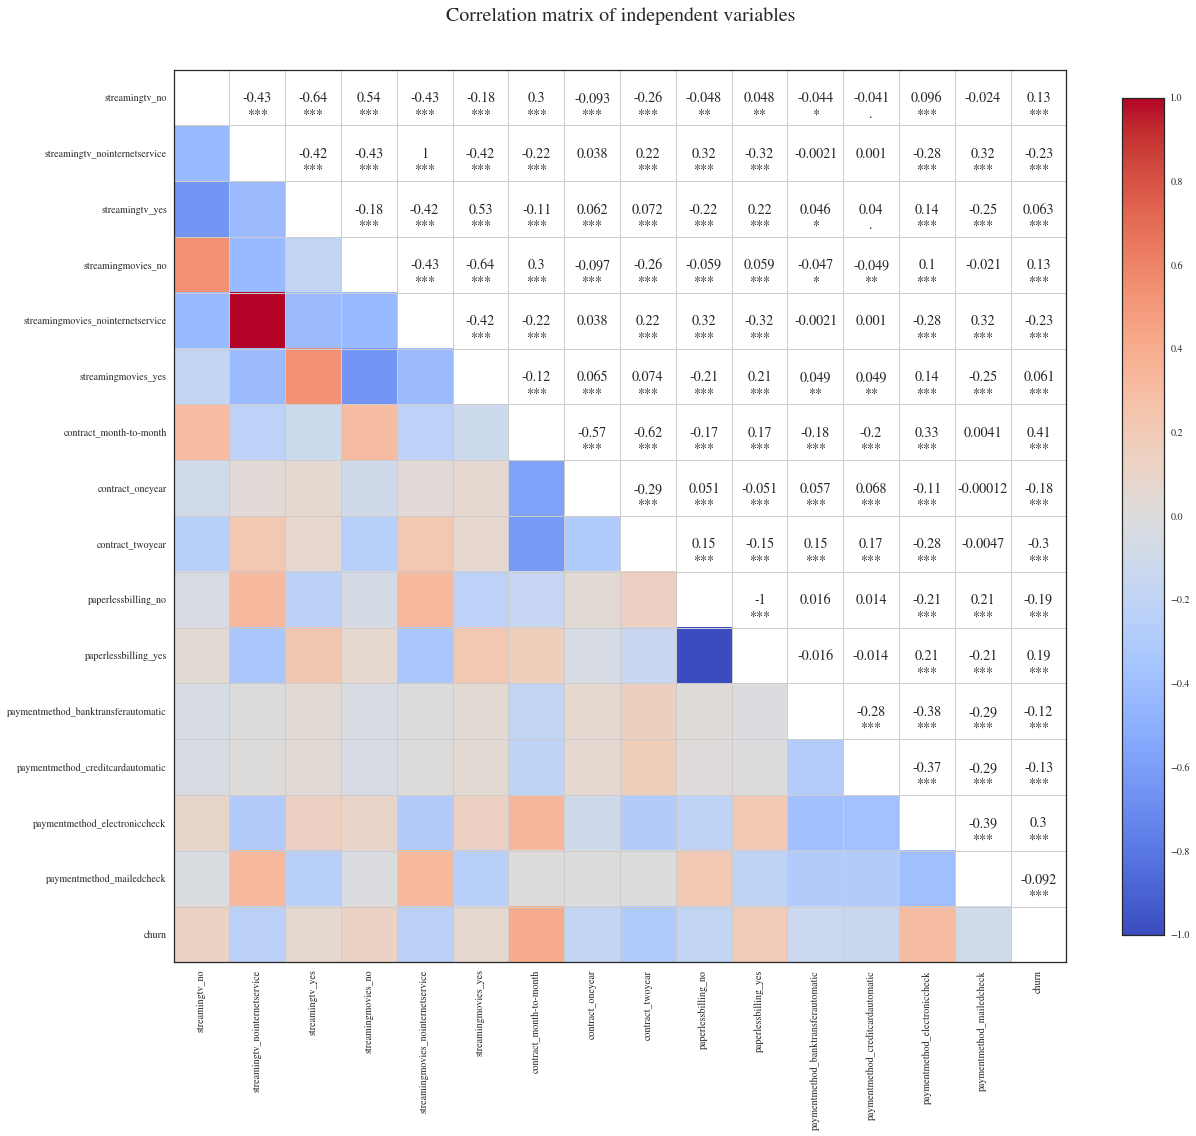

In [28]:
#correlation matrix vairables
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Correlation matrix of independent variables', fontsize=20)
sns.corrplot(churnDF[[u'streamingtv_no', u'streamingtv_nointernetservice', u'streamingtv_yes', u'streamingmovies_no', 
                      u'streamingmovies_nointernetservice', u'streamingmovies_yes', u'contract_month-to-month', 
                      u'contract_oneyear', u'contract_twoyear', u'paperlessbilling_no', u'paperlessbilling_yes', 
                      u'paymentmethod_banktransferautomatic', u'paymentmethod_creditcardautomatic', 
                      u'paymentmethod_electroniccheck', u'paymentmethod_mailedcheck', u'churn']], diag_names=False, ax=ax);
plt.show()

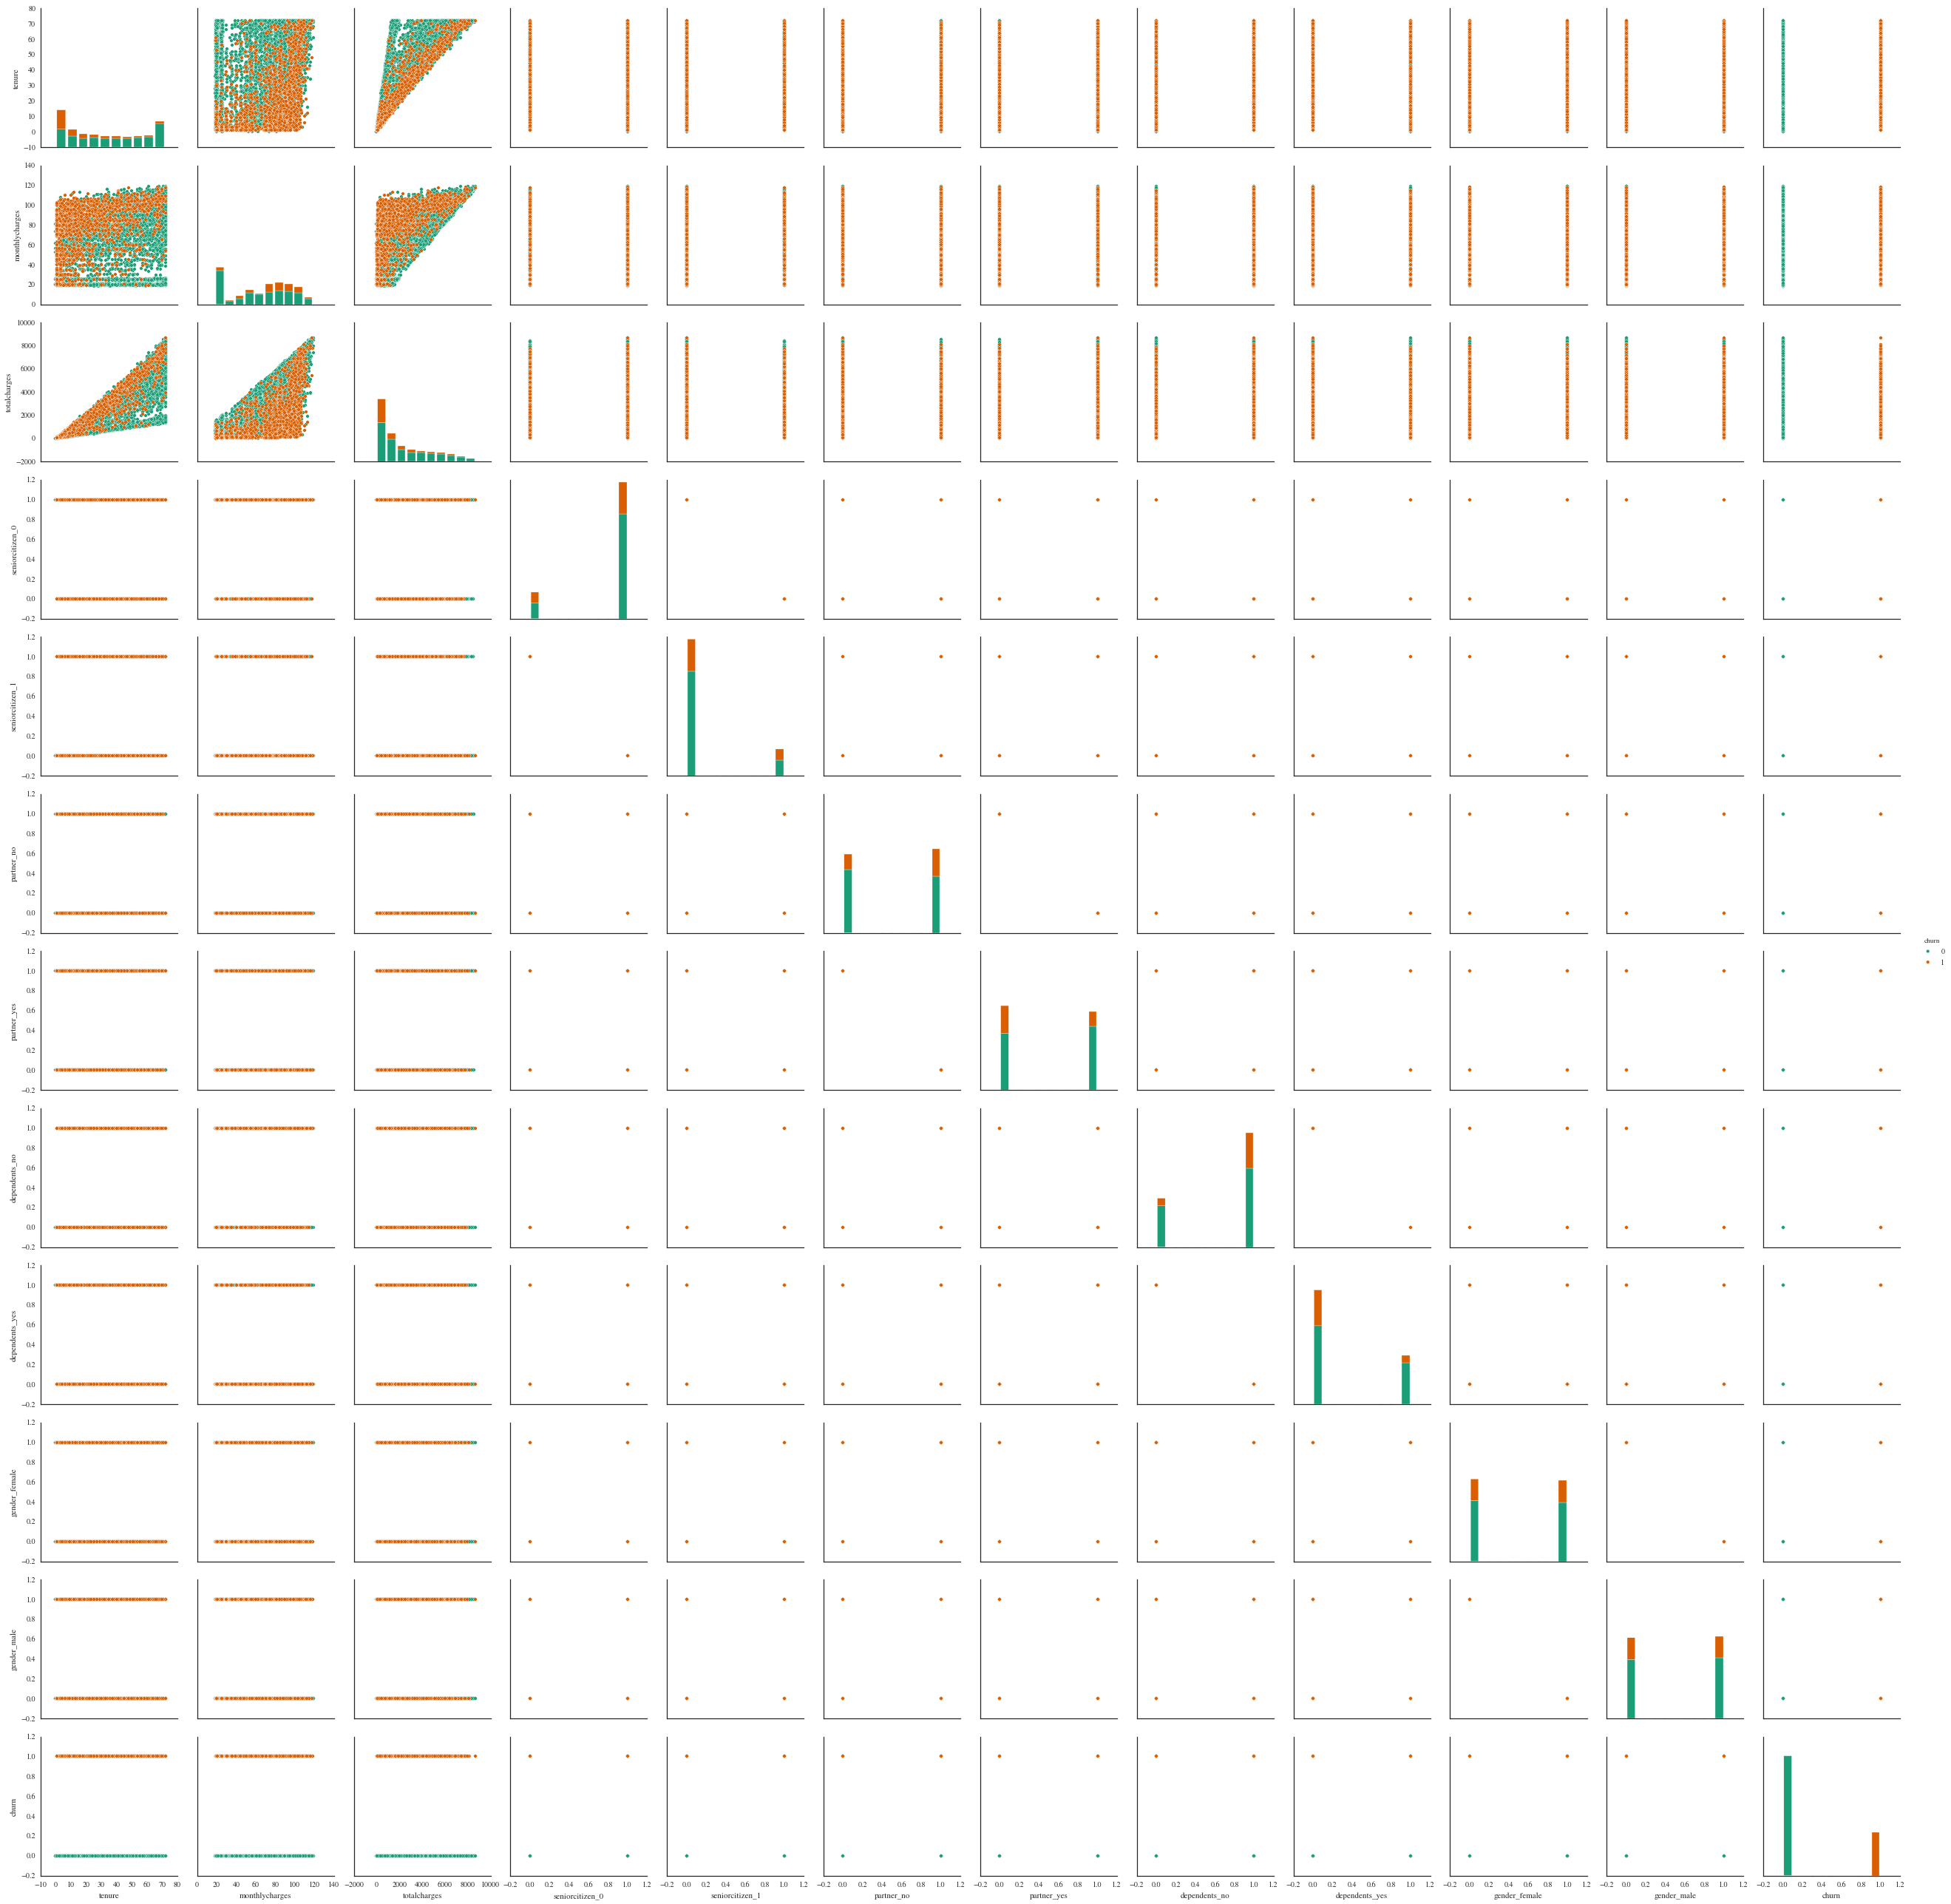

In [29]:
#pairplot of temperature variables
sns.pairplot(churnDF[[u'tenure', u'monthlycharges', u'totalcharges', u'seniorcitizen_0', u'seniorcitizen_1', 
                      u'partner_no', u'partner_yes', u'dependents_no', u'dependents_yes', u'gender_female', u'gender_male',
                      u'churn']], hue='churn')
plt.show()

##Features Extraction

In [192]:
#isolate response/dependent variable
churn_result = churnDF['Churn']

#drop unwanted columns
to_drop = ['customerID','Churn']
dfChurn = churnDF.drop(to_drop, axis=1)
dfChurn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [193]:
print churnDF['tenure'].min()
print churnDF['tenure'].max()
print churnDF['MonthlyCharges'].min()
print churnDF['MonthlyCharges'].max()
print churnDF['TotalCharges'].min()
print churnDF['TotalCharges'].max()

0
72
18.25
118.75
0.0
8684.8


In [194]:
# Pull out features for future use
features = dfChurn.columns

X = dfChurn.as_matrix().astype(np.float)

# Normalize each features / scale to relative size (tenure 1-xx vs TotalCharges xxx)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 7043 observations and 19 features
Unique target labels: [0 1]


In [197]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [198]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Support vector machines:
0.795
Random forest:
0.780
K-nearest-neighbors:
0.754


In [200]:
from sklearn.metrics import confusion_matrix

y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,run_cv(X,y,RF)) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
]